# Load Store Handler Class

In [95]:
from linkingtool.hdf5_handler import DataHandler
import linkingtool.visuals as vis
import pandas as pd
import geopandas as gpd

In [96]:
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define Province Code

In [97]:
province_code:str='BC' # The tool is designed to work for any province of CANADA.
store=f"../data/store/resources_{province_code}.h5" 
datahandler=DataHandler(store) # the DataHandler object could be initiated without the store definition as well.

# What's inside the Store ?

In [98]:
datahandler.show_tree(store) # Shows the hierarchical data inside the store

Structure of HDF5 file: ../data/store/resources_BC.h5
[Group] boundary
[Group] cells
[Group] clusters
  └─ [Group] clusters/solar
  └─ [Group] clusters/wind
[Group] cost
  └─ [Group] cost/atb
  └─   └─ [Group] cost/atb/bess
  └─   └─ [Group] cost/atb/solar
  └─   └─ [Group] cost/atb/wind
[Group] dissolved_indices
  └─ [Group] dissolved_indices/solar
  └─ [Group] dissolved_indices/wind
[Group] substations
[Group] timeseries
  └─ [Group] timeseries/clusters
  └─   └─ [Group] timeseries/clusters/solar
  └─   └─ [Group] timeseries/clusters/wind
  └─ [Group] timeseries/solar
  └─ [Group] timeseries/wind
[Group] units


# Load Data from Store

In [99]:
# Loading Geodataframes
cells=datahandler.from_store('cells')
boundary=datahandler.from_store('boundary')
timeseries_clusters_solar=datahandler.from_store('timeseries/clusters/solar')
timeseries_clusters_wind=datahandler.from_store('timeseries/clusters/wind')
clusters_solar=datahandler.from_store('clusters/solar')
clusters_wind=datahandler.from_store('clusters/wind')

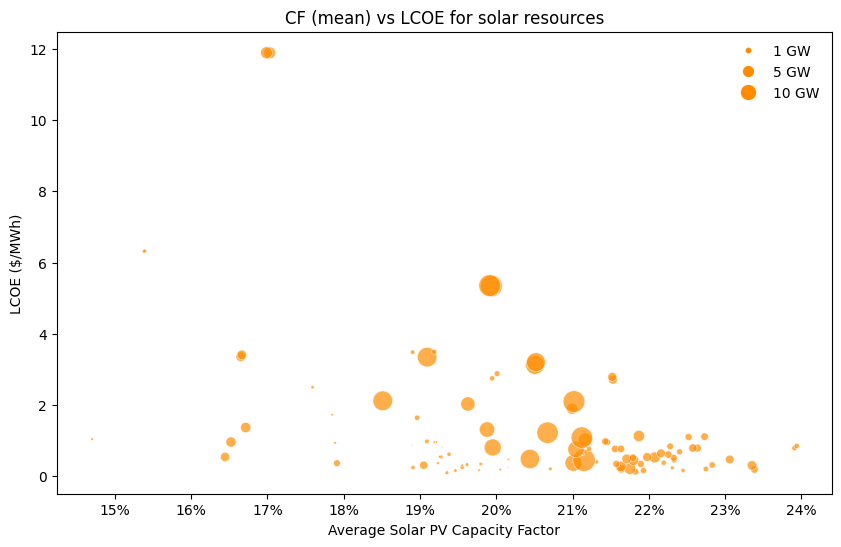

In [100]:
from matplotlib.ticker import MultipleLocator, FuncFormatter

import matplotlib.pyplot as plt

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    clusters_solar['CF_mean'],
    clusters_solar['lcoe'],
    s=clusters_solar['potential_capacity'] / 100,  # Adjust the size for better visualization
    alpha=0.7,
    c='darkorange',
    edgecolors='w',
    linewidth=0.5
)

# Set labels and title
ax.set_xlabel('Average Solar PV Capacity Factor')
ax.set_ylabel('LCOE ($/MWh)')
ax.set_title('CF (mean) vs LCOE for solar resources')

# Customize x-axis ticks to show more levels and as percentages
ax.xaxis.set_major_locator(MultipleLocator(0.01))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))

size_labels = [1, 5, 10]  # GW
size_values = [s * 1000 for s in size_labels]  # Convert GW to same scale as scatter

legend_handles = [
    mlines.Line2D([], [], color='darkorange', marker='o', linestyle='None',
                  markersize=np.sqrt(size / 100), label=f'{label} GW')
    for size, label in zip(size_values, size_labels)
]

ax.legend(handles=legend_handles, loc='upper right',frameon=False)
# Show plot
plt.show()

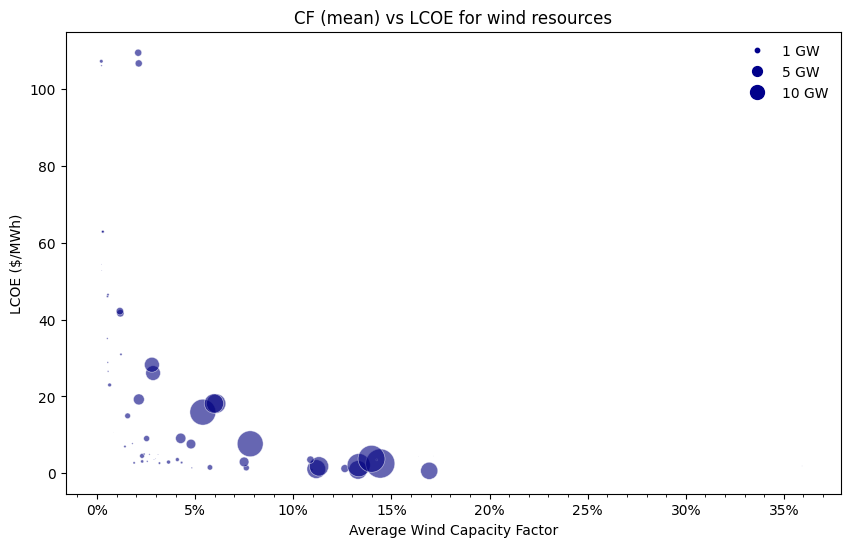

In [101]:
from matplotlib.ticker import MultipleLocator, FuncFormatter

import matplotlib.pyplot as plt

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    clusters_wind['CF_mean'],
    clusters_wind['lcoe'],
    s=clusters_wind['potential_capacity'] / 100,  # Adjust the size for better visualization
    alpha=0.6,
    c='navy',
    edgecolors='w',
    linewidth=0.5
)

# Set labels and title
ax.set_xlabel('Average Wind Capacity Factor')
ax.set_ylabel('LCOE ($/MWh)')
ax.set_title('CF (mean) vs LCOE for wind resources')

# Customize x-axis ticks to show more levels and as percentages
ax.xaxis.set_major_locator(MultipleLocator(0.05))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))

size_labels = [1, 5, 10]  # GW
size_values = [s * 1000 for s in size_labels]  # Convert GW to same scale as scatter

legend_handles = [
    mlines.Line2D([], [], color='darkblue', marker='o', linestyle='None',
                  markersize=np.sqrt(size / 100), label=f'{label} GW')
    for size, label in zip(size_values, size_labels)
]

ax.legend(handles=legend_handles, loc='upper right',frameon=False)

# Show plot
plt.show()

2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.


2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.
2025-03-19 13:07:24 - WARNING - findfont: Font family 'Times New Roman' not found.


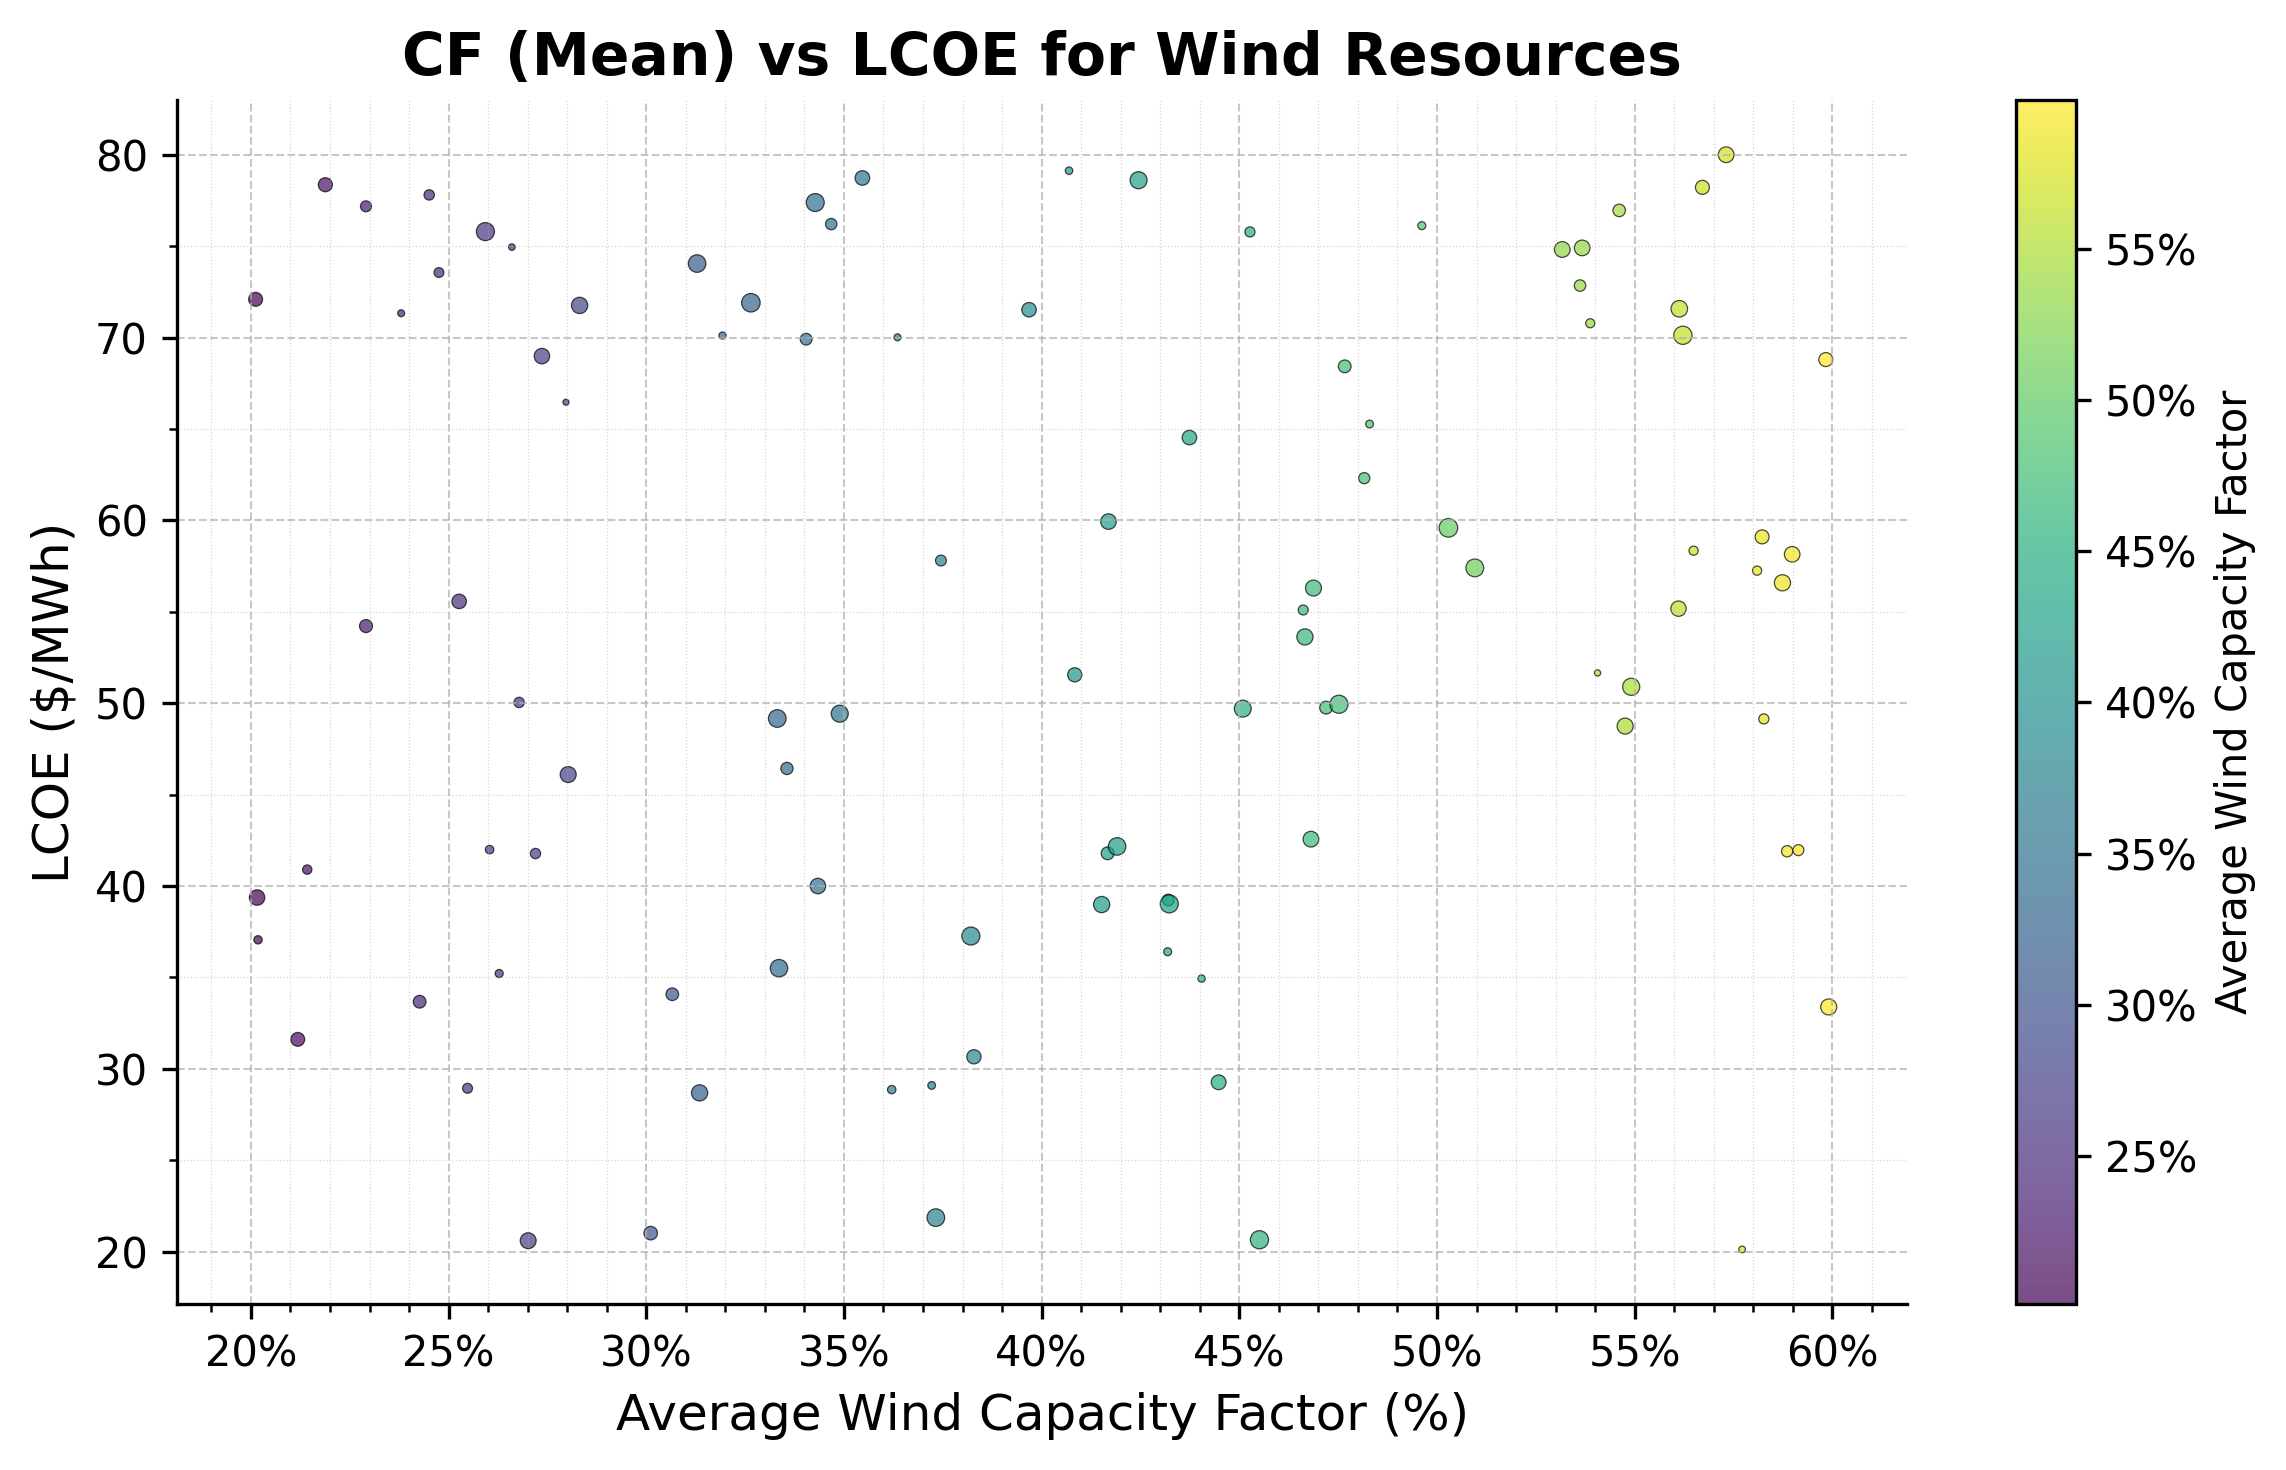

In [102]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import numpy as np

# Sample Data (Replace with actual dataset)
clusters_solar = {
    'CF_mean': np.random.uniform(0.2, 0.6, 100),
    'lcoe': np.random.uniform(20, 80, 100),
    'potential_capacity': np.random.uniform(100, 1000, 100)
}

# Create Figure and Axes
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

# Scatter Plot with Improved Color Mapping
scatter = ax.scatter(
    clusters_solar['CF_mean'],
    clusters_solar['lcoe'],
    s=clusters_solar['potential_capacity'] / 50,  # Adjust size for clarity
    alpha=0.7,
    c=clusters_solar['CF_mean'],  # Colormap based on CF_mean
    cmap='viridis',
    edgecolors='k',
    linewidth=0.3
)

# Labels and Title
ax.set_xlabel('Average Wind Capacity Factor (%)', fontsize=12, fontname="Times New Roman")
ax.set_ylabel('LCOE ($/MWh)', fontsize=12, fontname="Times New Roman")
ax.set_title('CF (Mean) vs LCOE for Wind Resources', fontsize=14, fontweight='bold', fontname="Times New Roman")

# X-axis Formatting
ax.xaxis.set_major_locator(MultipleLocator(0.05))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))

# Y-axis Formatting
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

# Grid for Better Readability
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)

# Remove Top & Right Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Colorbar for CF Mean
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Average Wind Capacity Factor', fontsize=10, fontname="Times New Roman")
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))

# Show Plot
plt.tight_layout()
plt.show()


In [103]:
clusters_wind_f=clusters_wind[clusters_wind['potential_capacity']>0]
clusters_solar_f=clusters_solar[clusters_solar['potential_capacity']>0]

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
print(f'Total sites {len(clusters_wind_f)}')
total_capacity=clusters_wind_f.potential_capacity.sum()
print(f'Total Capacity {int(total_capacity/1E3)} GW')
sites=5
top_sites_capacity=clusters_wind_f.head(sites).potential_capacity.sum()
print(f'Top {sites} sites ({round(sites/len(clusters_wind_f)*100)}% site) capacity {int(top_sites_capacity/1E3)} GW ({round(top_sites_capacity/total_capacity*100)}% of total capacity)')

Total sites 62
Total Capacity 364 GW
Top 5 sites (8% site) capacity 54 GW (15% of total capacity)


In [ ]:
print(f'Total sites {len(clusters_solar_f)}')
total_capacity=clusters_solar_f.potential_capacity.sum()
print(f'Total Capacity {int(total_capacity/1E3)} GW')
sites=5
top_sites_capacity=clusters_solar_f.head(sites).potential_capacity.sum()
print(f'Top {sites} sites ({round(sites/len(clusters_solar_f)*100)}% site) capacity {int(top_sites_capacity/1E3)} GW ({round(top_sites_capacity/total_capacity*100)}% of total capacity)')

Total sites 109
Total Capacity 519 GW
Top 5 sites (5% site) capacity 6 GW (1% of total capacity)


# Static Plots

In [ ]:
cpcad=pd.read_pickle(f'../data/downloaded_data/lands/ProtectedConservedArea_{province_code}.pickle')

KeyboardInterrupt: 

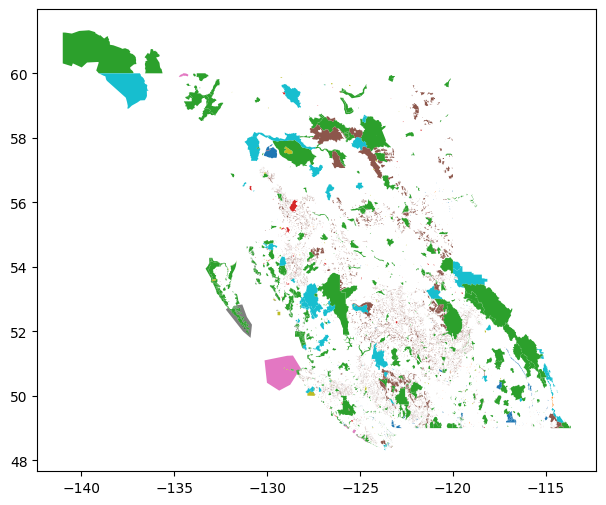

In [ ]:
import matplotlib.pyplot as plt

# Shadow effect offset
shadow_offset = 0.008

fig, ax = plt.subplots(figsize=(12,6))

# Plot the cpcad_BC data
cpcad.plot('IUCN_CAT_desc', ax=ax)
cpcad.geometry = cpcad.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)
cpcad.plot('IUCN_CAT_desc', legend=True, 
              legend_kwds={'title': "Canadian Protected and Conserved Areas", 
                           'loc': 'lower left', 
                           'bbox_to_anchor': (.01, 0.01), 
                           'frameon': False, 
                           'prop': {'size': 7}},  # Adjust font size (smaller values make it more compact)
              ax=ax)

# Plot solar map on ax1
# Add shadow effect 
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.3, alpha=1)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.2, alpha=0.9)  # Shadow layer

# Turn off the axis grid
ax.grid(False)
ax.axis('off')
plt.tight_layout()
plt.savefig(f'../vis/misc/CPCAD_{province_code}.png', dpi=300)

In [ ]:
aeroway=gpd.read_file('../data/downloaded_data/OSM/BC_aeroway.geojson')

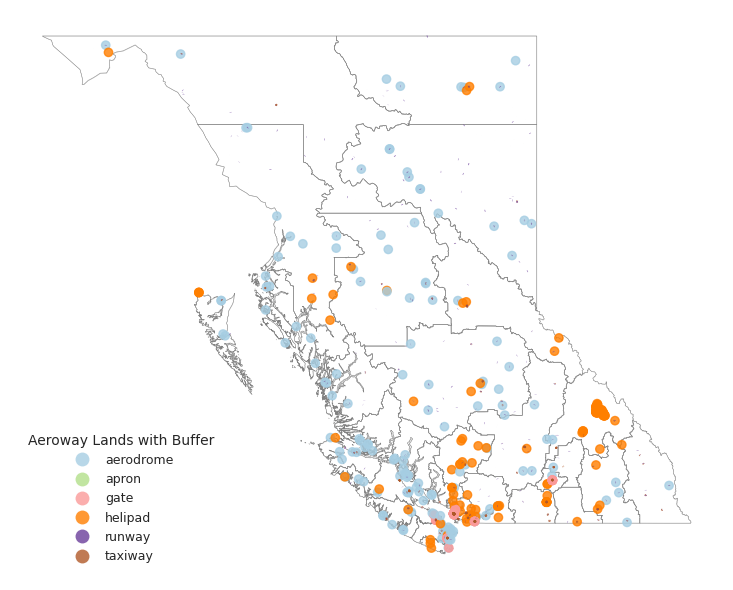

In [ ]:
import matplotlib.pyplot as plt

# Shadow effect offset
shadow_offset = 0.008

fig, ax = plt.subplots(figsize=(12,6))



# Plot boundary with shadow effect
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.3, alpha=1)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.2, alpha=0.9)  # Shadow layer
# Plot the aeroway data with more vibrant colors
aeroway.geometry = aeroway.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)
aeroway.plot('aeroway', legend=True, 
              legend_kwds={'title': "Aeroway Lands with Buffer", 
                           'loc': 'lower left', 
                           'bbox_to_anchor': (.01, 0.01), 
                           'frameon': False, 
                           'prop': {'size': 9}},  # Adjust font size (smaller values make it more compact)
              ax=ax,
              alpha=0.8,
              cmap='Paired')  # Use a vibrant colormap
# Turn off the axis grid
ax.grid(False)
ax.axis('off')
plt.tight_layout()
plt.savefig(f'../vis/misc/Aeroway_{province_code}.png', dpi=300)


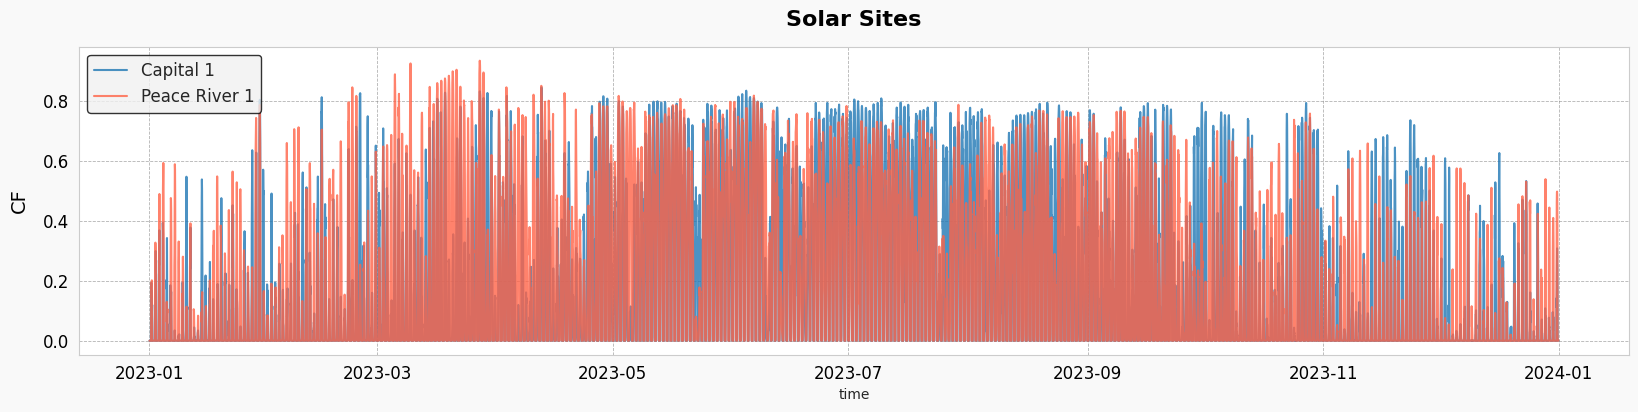

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")  

# Create figure
fig, ax = plt.subplots(figsize=(20, 4), facecolor="#f9f9f9")  # Light background

# Define custom colors
colors = ['#1f77b4', '#ff6347']

# Plot using Seaborn
sns.lineplot(data=timeseries_clusters_solar, x=timeseries_clusters_solar.index, y='Capital_1', ax=ax, color=colors[0], linewidth=1.5, alpha=0.8, label="Capital 1")
sns.lineplot(data=timeseries_clusters_solar, x=timeseries_clusters_solar.index, y='PeaceRiver_1', ax=ax, color=colors[1], linewidth=1.5, alpha=0.8, label="Peace River 1")

# Enhance aesthetics
ax.set_facecolor("#ffffff")  # Pure white plot area
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6, color="gray")

# Labels & title
ax.set_title("Solar Sites", fontsize=16, color="black", fontweight="bold", pad=15)
# ax.set_xlabel("Time", fontsize=14, color="black", labelpad=10)
ax.set_ylabel("CF", fontsize=14, color="black", labelpad=10)

# Customize ticks
ax.tick_params(axis='x', colors="black", labelsize=12)
ax.tick_params(axis='y', colors="black", labelsize=12)

# Add a legend
ax.legend(facecolor="#f0f0f0", edgecolor="black", fontsize=12, loc="upper left", frameon=True)

# Show plot
plt.show()


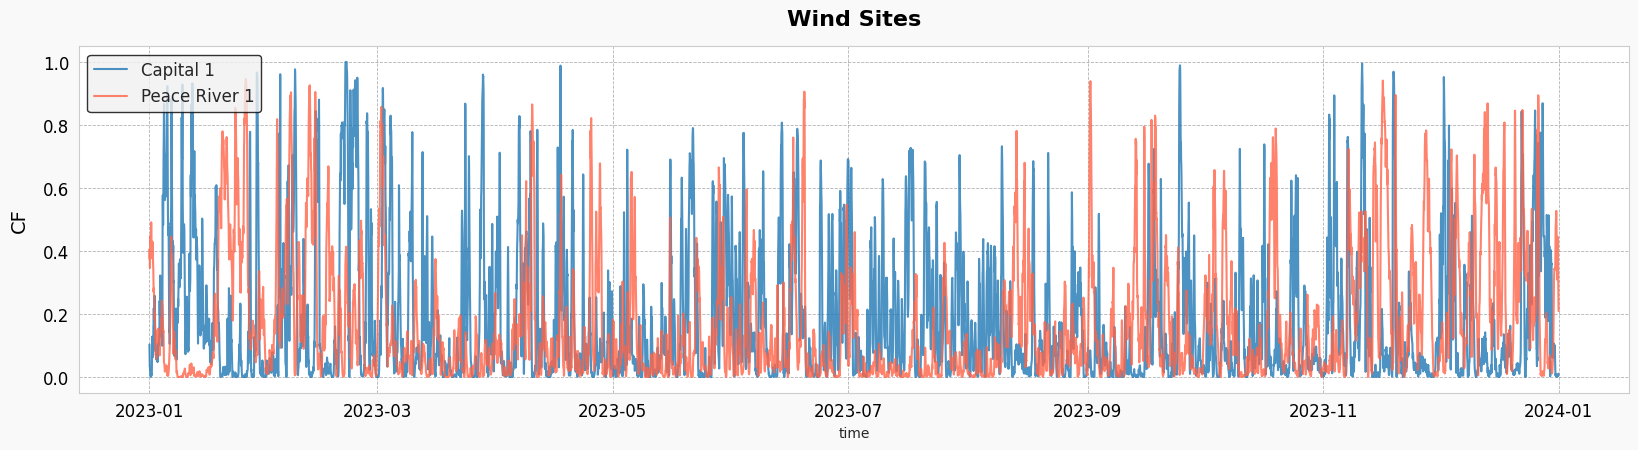

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")  

# Create figure
fig, ax = plt.subplots(figsize=(20, 4.5), facecolor="#f9f9f9")  # Light background

# Define custom colors
colors = ['#1f77b4', '#ff6347']

# Plot using Seaborn
sns.lineplot(data=timeseries_clusters_wind, x=timeseries_clusters_wind.index, y='Capital_1', ax=ax, color=colors[0], linewidth=1.5, alpha=0.8, label="Capital 1")
sns.lineplot(data=timeseries_clusters_wind, x=timeseries_clusters_wind.index, y='PeaceRiver_1', ax=ax, color=colors[1], linewidth=1.5, alpha=0.8, label="Peace River 1")

# Enhance aesthetics
ax.set_facecolor("#ffffff")  # Pure white plot area
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6, color="gray")

# Labels & title
ax.set_title("Wind Sites", fontsize=16, color="black", fontweight="bold", pad=15)
# ax.set_xlabel("Time", fontsize=14, color="black", labelpad=10)
ax.set_ylabel("CF", fontsize=14, color="black", labelpad=10)

# Customize ticks
ax.tick_params(axis='x', colors="black", labelsize=12)
ax.tick_params(axis='y', colors="black", labelsize=12)

# Add a legend
ax.legend(facecolor="#f0f0f0", edgecolor="black", fontsize=12, loc="upper left", frameon=True)

# Show plot
plt.show()


# Static Data Visuals in Interactive Maps

In [ ]:
import hvplot.pandas
import holoviews as hv
from holoviews import opts
from bokeh.layouts import gridplot
from bokeh.io import show

# Initialize Holoviews extension
hv.extension('bokeh')


# Define a dictionary to map columns to specific colormaps
cmap_mapping = {
    'lcoe_wind': 'cool',
    'potential_capacity_wind': 'Blues',
    'lcoe_solar': 'autumn',
    'CF_IEC2': 'RdYlGn',
    'wind_CF_mean': 'RdYlGn',
    'windspeed_ERA5': 'winter',
    'nearest_station_distance_km': 'Oranges',
    'potential_capacity_wind': 'Blues',
    'potential_capacity_solar': 'Oranges',
}

# Define a function to create individual plots
def create_plot(column_name, cmap):
    return cells.hvplot(
        color=column_name,
        cmap=cmap,
        geo=True,
        tiles='CartoDark',  # Default base map
        frame_width=300,  # Adjust the size of the plots
        frame_height=300,  # Adjust the size of the plots
        data_aspect=.5,
        alpha=0.8,
        line_color='None',
        line_width=0.1,
        hover_line_color='red'
    ).opts(title=column_name,
            show_grid=True,
            show_legend=True,
            tools=['hover', 'pan', 'wheel_zoom','reset','box_select'],
            legend_position='top_right'
        )

# Create a list of plots for each column
plots = [create_plot(col, cmap) for col, cmap in cmap_mapping.items()]

# Create a grid layout for the plots
grid = hv.Layout(plots).cols(3)  # Adjust the number of columns as needed

# Show the layout
hv.save(grid, '../docs/grid_plots.html')  # Save the grid layout as an HTML file



# Render the layout as a Bokeh object
bokeh_layout = hv.render(grid, backend='bokeh')

# Show the layout
show(bokeh_layout)

2025-03-16 10:05:52 - WARNING - W-1005 (FIXED_SIZING_MODE): 'fixed' sizing mode requires width and height to be set: figure(id='p1267', ...)
2025-03-16 10:05:52 - WARNING - W-1005 (FIXED_SIZING_MODE): 'fixed' sizing mode requires width and height to be set: figure(id='p1819', ...)
2025-03-16 10:05:52 - WARNING - W-1005 (FIXED_SIZING_MODE): 'fixed' sizing mode requires width and height to be set: figure(id='p1175', ...)
2025-03-16 10:05:52 - WARNING - W-1005 (FIXED_SIZING_MODE): 'fixed' sizing mode requires width and height to be set: figure(id='p1635', ...)
2025-03-16 10:05:52 - WARNING - W-1005 (FIXED_SIZING_MODE): 'fixed' sizing mode requires width and height to be set: figure(id='p1359', ...)
2025-03-16 10:05:52 - WARNING - W-1005 (FIXED_SIZING_MODE): 'fixed' sizing mode requires width and height to be set: figure(id='p1543', ...)
2025-03-16 10:05:52 - WARNING - W-1005 (FIXED_SIZING_MODE): 'fixed' sizing mode requires width and height to be set: figure(id='p1727', ...)
2025-03-16 10

KeyboardInterrupt: 

# Timeseries Plots

In [ ]:
clusters_solar=datahandler.from_store('clusters/solar')

In [ ]:
import pandas as pd
import hvplot.pandas
import panel as pn
import random

# Initialize Panel with the dark theme
pn.extension(theme='default')

# Load your DataFrames
df_solar = timeseries_clusters_solar  # Your solar DataFrame
df_wind = timeseries_clusters_wind    # Your wind DataFrame

# Create a list of the column names for the dropdowns
solar_options = df_solar.columns.tolist()
wind_options = df_wind.columns.tolist()

# Function to generate a random vibrant color
def get_random_vibrant_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(150, 255), random.randint(150, 255), random.randint(150, 255))


# Create a function to update the solar plot based on the selected time series
def update_solar_plot(selected_series):
    return df_solar[selected_series].hvplot.line(
        title=f"Time Series - Solar: {selected_series}",
        xlabel="DateTime",
        ylabel="Value",
        legend='top_left',
        width=1000,  # Width of the plot
        height=200,  # Height of the plot
        tools=['hover'],  # Enable hover tool
        line_color=get_random_vibrant_color()  # Random vibrant color for the solar plot
    )

# Create a function to update the wind plot based on the selected time series
def update_wind_plot(selected_series):
    return df_wind[selected_series].hvplot.line(
        title=f"Time Series - Wind: {selected_series}",
        xlabel="DateTime",
        ylabel="Value",
        legend='top_left',
        width=1000,  # Width of the plot
        height=200,  # Height of the plot
        tools=['hover'],  # Enable hover tool
        line_color=get_random_vibrant_color()  # Random vibrant color for the wind plot
    )

# Create dropdown widgets for selecting the time series
solar_dropdown = pn.widgets.Select(name='Select Solar Time Series', options=solar_options)
wind_dropdown = pn.widgets.Select(name='Select Wind Time Series', options=wind_options)

# Create dynamic panels that update the plot based on the dropdown selections
dynamic_solar_plot = pn.bind(update_solar_plot, selected_series=solar_dropdown)
dynamic_wind_plot = pn.bind(update_wind_plot, selected_series=wind_dropdown)

# Create a layout with the dropdowns and the plots in a two-row grid
grid_layout = pn.Column(
    solar_dropdown, dynamic_solar_plot,  # Solar plot in the first row
    wind_dropdown, dynamic_wind_plot     # Wind plot in the second row
)

# Save the grid layout as an HTML file
grid_layout.save('../docs/time_series_plots.html')

# Display the panel in a notebook or in a web application
grid_layout.show()

In [ ]:
clusters_solar.loc['CowichanValley_1']

In [ ]:
import pandas as pd
import hvplot.pandas
import panel as pn
import random

# Initialize Panel with the dark theme
pn.extension(theme='default')

# Load your DataFrames
df_solar = timeseries_clusters_solar  # Your solar DataFrame
df_wind = timeseries_clusters_wind    # Your wind DataFrame
clusters_solar = clusters_solar       # Your clusters_solar DataFrame

# Create a list of the column names for the dropdowns
solar_options = df_solar.columns.tolist()
wind_options = df_wind.columns.tolist()

# Function to generate a random vibrant color
def get_random_vibrant_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(150, 255), random.randint(150, 255), random.randint(150, 255))

# Create a function to update the solar plot based on the selected time series
def update_solar_plot(selected_series):
    return df_solar[selected_series].hvplot.line(
        title=f"Time Series - Solar: {selected_series}",
        xlabel="DateTime",
        ylabel="Value",
        legend='top_left',
        width=1000,  # Width of the plot
        height=300,  # Increased height for better visibility
        tools=['hover'],  # Enable hover tool
        line_color=get_random_vibrant_color(),  # Random vibrant color for the solar plot
        line_width=2,  # Make line thicker for better visibility
        fontsize={'title': 16, 'xlabel': 14, 'ylabel': 14, 'legend': 12},  # Adjust font sizes
    )

# Create a function to update the wind plot based on the selected time series
def update_wind_plot(selected_series):
    return df_wind[selected_series].hvplot.line(
        title=f"Time Series - Wind: {selected_series}",
        xlabel="DateTime",
        ylabel="Value",
        legend='top_left',
        width=1000,  # Width of the plot
        height=300,  # Increased height for better visibility
        tools=['hover'],  # Enable hover tool
        line_color=get_random_vibrant_color(),  # Random vibrant color for the wind plot
        line_width=2,  # Make line thicker for better visibility
        fontsize={'title': 16, 'xlabel': 14, 'ylabel': 14, 'legend': 12},  # Adjust font sizes
    )

# Create dropdown widgets for selecting the time series
solar_dropdown = pn.widgets.Select(name='Select Solar Time Series', options=solar_options, width=300)
wind_dropdown = pn.widgets.Select(name='Select Wind Time Series', options=wind_options, width=300)


# Create dynamic panels that update the plot based on the dropdown selections
dynamic_solar_plot = pn.bind(update_solar_plot, selected_series=solar_dropdown)
dynamic_wind_plot = pn.bind(update_wind_plot, selected_series=wind_dropdown)

# Function to get relevant row data from clusters_solar
def get_cluster_info(selected_series):
    # Use the selected series name to find the relevant row in clusters_solar
    selected_row = clusters_solar.loc[selected_series]
    return selected_row

# Create a function to update the table based on the selected time series
def update_cluster_table(selected_series):
    cluster_info = get_cluster_info(selected_series)
    
    # Drop the geometry column if it exists
    if 'geometry' in cluster_info.index:
        cluster_info = cluster_info.drop('geometry')
    
    # Return the DataFrame widget without the geometry column
    return pn.widgets.DataFrame(cluster_info.to_frame().T, width=800, height=200)


# Create dynamic panels for the table
dynamic_cluster_table = pn.bind(update_cluster_table, selected_series=solar_dropdown)

# Adjust the overall layout for better alignment and spacing
grid_layout = pn.Column(
    pn.Row(solar_dropdown, dynamic_solar_plot, align="center"),  # Center align solar dropdown and plot
    pn.Row(dynamic_cluster_table),  # Show the table below the solar plot
    pn.Row(wind_dropdown, dynamic_wind_plot, align="center"),    # Center align wind dropdown and plot
    sizing_mode='stretch_width',  # Make layout responsive to different screen sizes
    width=1100,  # Set a consistent width for the layout
    height=900   # Adjust height to give more space for plots
)

# Save the grid layout as an HTML file
grid_layout.save('../docs/time_series_plots_with_table.html')

# Display the panel in a notebook or in a web application
grid_layout.show()
